# Quinta-feira, 04-02-2021

 * Atividade de hoje: **Manipulação de Tabelas com Pandas**
 * Responsável: **Doutorando Renato A. Corrêa dos Santos (GBM-UNICAMP)** (`renatoacsantos@gmail.com`)

Dados da atividade prática foram baixados do [Kaggle](https://www.kaggle.com/unanimad/corona-virus-brazil), com usuário `renatoacsantos@gmail.com` . Estamos usando também dados disponíveis na [Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Brazil/Statistics#Statistics), que correspondem a dados vindos do Ministério da Saúde.

Há diversos tutoriais na internet. Por exemplo:
A `Julia Evans` tem um repositório com tutoriais de `pandas` no Github:
 * [Pandas Cookbook](https://github.com/jvns/pandas-cookbook)

No evento anual ["Workshop de Python para Dados Biológicos"](https://btwbd.gitlab.io/sitepythonbiodata2020/) também produzimos material interessante para as aulas. Em 2020, o [Prof. Gabriel Alves Margarido](http://www.genetica.esalq.usp.br/equipe/gabriel-rodrigues-alves-margarido) produziu um tutorial bem bacana introdutório de pandas.

Nesta atividade eu trago um pouco de `**pandas**`, usando como base alguns destes materiais.



Usando os dados que estão disponíveis no Kaggle:

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
with open('/content/drive/My Drive/UNICAMP/GBMeeting/Workshop de Python para GBMeeters/brazil_cities_coordinates.csv', 'w') as f:
  f.write('Hello Goodle Drive!')
  !cat /content/drive/My\ Drive/UNICAMP/GBMeeting/Workshop\ de\ Python\ para\ GBMeeters/brazil_cities_coordinates.csv

Como vocês já viram, nós importamos bibliotecas do python usando `import`.
Costumamos abreviar o nome da biblioteca como `pd`, a fim de facilitar a busca e chamada de suas funções e métodos. Para isso usamos `as pd`:

In [8]:
import pandas as pd

## Estrutura de dados: Series

Vamos começar olhando para a estrutura de dados mais simples, `Series`.
Estas são estruturas como listas, que armazenam qualquer tipo de dados (`int`, `float`, `string`, etc.). Além disso, são unidimensionais e indexadas.

Começaremos olhando para dicionários, que vocês já viram anteriormente:



In [30]:
casos = { 0 : 28629, 1 : 26106, 2 : 22282, 3 : 18947, 4 : 10100, 5 : 8501, 6 : 11843, 7 : 23976}

Ou então listas, que vocês também já viram:


In [31]:
casos = [28629,26106,22282,18947,10100,8501,11843,23976]

As `Series` de pandas são criadas usando o método `Series` da biblioteca `pandas`:

In [32]:
casosSr = pd.Series(casos)

In [33]:
casosSr

0    28629
1    26106
2    22282
3    18947
4    10100
5     8501
6    11843
7    23976
dtype: int64

Os índices podem ser usados para acessar um ou mais conjuntos de dados desta `Series`

In [34]:
casosSr[0]

28629

In [35]:
casosSr[[0,7]]

0    28629
7    23976
dtype: int64

Diferentemente das listas, `Series` podem ser indexadas com outros caracteres, não apenas números (isso porque este é um array de qualquer tipo de dado de `NumPy`).

Além disso, a biblioteca `pandas` permite a criação de índices não únicos.



In [36]:
casosSr = pd.Series(casos, index=['a', 'b', 'c','d','e','f','g','h'])

In [37]:
casosSr

a    28629
b    26106
c    22282
d    18947
e    10100
f     8501
g    11843
h    23976
dtype: int64

In [38]:
casosSr = pd.Series(casos, index=['a', 'b', 'c','d','e','f','g','g'])

Obviamente, é possível acessar os valores ou conjuntos a partir dos índices únicos.

In [39]:
casosSr['a']

28629

Mas é também possível acessar os índices dos índices duplicados:

In [40]:
casosSr[['a','g']] # índice 'g' está duplicado

a    28629
g    11843
g    23976
dtype: int64

In [41]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

In [61]:
list(range(1,5,2))

[1, 3]

In [42]:
list(range(7))+[6]

[0, 1, 2, 3, 4, 5, 6, 6]

In [43]:
casosSr = pd.Series(casos, index=list(range(7))+[6])

In [44]:
casosSr

0    28629
1    26106
2    22282
3    18947
4    10100
5     8501
6    11843
6    23976
dtype: int64

As operações realizadas com Series preservarão os índices originais.
Por exemplo, imaginem que a gente queira filtrar baseado em algum limiar de valores. Vamos pegar os números de casos acima de 20k.

Reparem que o fato de um dos valores associados a um índice não satisfaz o filtro ('g'):

In [45]:
casosSr[casosSr > 20000]

0    28629
1    26106
2    22282
6    23976
dtype: int64

In [46]:
casosSr[casosSr < 20000]

3    18947
4    10100
5     8501
6    11843
dtype: int64

In [47]:
# Este caso vai dar erro, pois há índices duplicados (linhas com o mesmo nome)
casosSr[casosSr < 20000][casosSr > 15000]

ValueError: ignored

In [48]:
casosSr = pd.Series(casos, index=list(range(7))+[7])

In [50]:
casosSr[casosSr < 20000][casosSr > 15000]

3    18947
dtype: int64

Vamos tentar indexar com as datas de registro da doença. Criando uma *Series* com as datas:

In [49]:
casos_datas = ["28-10-2020","29-10-2020","30-10-2020","31-10-2020","01-11-2020","02-11-2020","03-11-2020","04-11-2020"]

Usando o método `.index`

In [51]:
casosSr.index = casos_datas

In [52]:
casosSr

28-10-2020    28629
29-10-2020    26106
30-10-2020    22282
31-10-2020    18947
01-11-2020    10100
02-11-2020     8501
03-11-2020    11843
04-11-2020    23976
dtype: int64

As operações são vetorizadas:

In [53]:
casosSr * 2

28-10-2020    57258
29-10-2020    52212
30-10-2020    44564
31-10-2020    37894
01-11-2020    20200
02-11-2020    17002
03-11-2020    23686
04-11-2020    47952
dtype: int64

Algumas operações matemáticas vêm da biblioteca `NumPy`, então devemos importá-la:

In [55]:
import numpy as np

In [56]:
np.exp(casosSr)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


28-10-2020    inf
29-10-2020    inf
30-10-2020    inf
31-10-2020    inf
01-11-2020    inf
02-11-2020    inf
03-11-2020    inf
04-11-2020    inf
dtype: float64

Vamos adicionar a esta nossa `Series` um índice novo, mas sem valor associado:



In [57]:
novaCasosSr = pd.Series(index=[7])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [58]:
novaCasosSr

7   NaN
dtype: float64

Veja que o índice 7 aparece com uma posição preenchida por `NaN`.

Em `pandas`, os dados aparecerão assim quando corresponderem a `NA` ou dados faltantes. Podem aparecer também como "missing", "not available".

É possível também considerar os `inf` como NaN, se desejado.

Ver esta página:
* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

Operações usuais definidas e apresentadas na aula do Felipe Rodrigues (Bidu):

|Operação|Operador|Exemplo|
|-----------|:---:|-------:|
|Soma|+|`3 + 2 = 5`|
|Subtração|-|`20 - 10 = 10`|
|Divisão|/|`3 / 2 = 1.5`|
|Div. Inteira|//|`5 // 2 = 2`|
|Modulo "resto"|%|`5 % 3 = 2`|
|Potência|\*\*|`10 ** 2 = 100`|
|Val. Absoluto|`abs(x)`|`abs(-10) = 10`|

Uma característica importante de `Series` é possível `alinhar` os índices de diferentes Series para realizar operações entre elas. Por exemplo, imaginem a situação em que queremos somar os números de casos em dois diferentes Estados brasileiros e cada Series apresenta um vetor de casos em um Estado.

In [ ]:
PR_Dez2020_2sem_casos = {'Dez8' : 4591, 'Dez9' : 5069, 'Dez10' : 3981, 'Dez11' : 5059, 'Dez12' : 4379, 'Dez13' : 2483, 'Dez14' : 2376}
RS_Dez2020_2sem_casos = {'Dez8' : 4114, 'Dez9' : 4861, 'Dez10' : 4435, 'Dez11' : 5163, 'Dez12' : 3557, 'Dez13' : 3891, 'Dez14' : 2303}
SC_Dez2020_2sem_casos = {'Dez8' : 6312, 'Dez9' : 5628, 'Dez10' : 5121, 'Dez11' : 4292, 'Dez12' : 5051, 'Dez13' : 1306, 'Dez14' : 4649}
PR_Dez2020_2sem_casosSr = pd.Series(PR_Dez2020_2sem_casos)
RS_Dez2020_2sem_casosSr = pd.Series(RS_Dez2020_2sem_casos)
SC_Dez2020_2sem_casosSr = pd.Series(SC_Dez2020_2sem_casos)

In [ ]:
PR_Dez2020_2sem_casosSr

Dez8     4591
Dez9     5069
Dez10    3981
Dez11    5059
Dez12    4379
Dez13    2483
Dez14    2376
dtype: int64

In [ ]:
RS_Dez2020_2sem_casosSr

Dez8     4114
Dez9     4861
Dez10    4435
Dez11    5163
Dez12    3557
Dez13    3891
Dez14    2303
dtype: int64

Vamos somar as casos em dois ou três Estados do Sul do país, em cada um dos dias da última semana (dados da [Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Brazil/Statistics#Statistics))

In [ ]:
PR_Dez2020_2sem_casosSr + RS_Dez2020_2sem_casosSr

Dez8      8705
Dez9      9930
Dez10     8416
Dez11    10222
Dez12     7936
Dez13     6374
Dez14     4679
dtype: int64

Somando os números de casos nos três estados do Sul do país:

In [ ]:
PR_Dez2020_2sem_casosSr + RS_Dez2020_2sem_casosSr + SC_Dez2020_2sem_casosSr

Dez8     15017
Dez9     15558
Dez10    13537
Dez11    14514
Dez12    12987
Dez13     7680
Dez14     9328
dtype: int64

Atribuindo esta soma a um novo objeto do tipo Series:

In [ ]:
SUL_Dez2020_2sem_casosSr = PR_Dez2020_2sem_casosSr + RS_Dez2020_2sem_casosSr + SC_Dez2020_2sem_casosSr

In [ ]:
SUL_Dez2020_2sem_casosSr

Dez8     15017
Dez9     15558
Dez10    13537
Dez11    14514
Dez12    12987
Dez13     7680
Dez14     9328
dtype: int64

Subtração:

In [ ]:
SUL_Dez2020_2sem_casosSr - PR_Dez2020_2sem_casosSr

Dez8     10426
Dez9     10489
Dez10     9556
Dez11     9455
Dez12     8608
Dez13     5197
Dez14     6952
dtype: int64

Atribuições aritméticas expandidas também funcionam com Series:

In [ ]:
SUL_Dez2020_2sem_casosSr

Dez8     15017
Dez9     15558
Dez10    13537
Dez11    14514
Dez12    12987
Dez13     7680
Dez14     9328
dtype: int64

In [ ]:
SUL_Dez2020_2sem_casosSr += 1

In [ ]:
SUL_Dez2020_2sem_casosSr

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
dtype: int64

Usando um pouquinhos os booleanos e os operadores de comparação, apresentados pelo Bidu. Os operadores booleandos começam a ter um sentido bastante interessante quando aplicamos a dados reais. Por exemplo, vamos verificar em quais dias da semana foram registrados mais de 10k casos de COVID-19 naquela semana.

In [ ]:
SUL_Dez2020_2sem_casosSr < 10000

Dez8     False
Dez9     False
Dez10    False
Dez11    False
Dez12    False
Dez13     True
Dez14     True
dtype: bool

In [ ]:
SUL_Dez2020_2sem_casosSr > 10000

Dez8      True
Dez9      True
Dez10     True
Dez11     True
Dez12     True
Dez13    False
Dez14    False
dtype: bool

In [ ]:
SUL_Dez2020_2sem_casosSr == 10000

Dez8     False
Dez9     False
Dez10    False
Dez11    False
Dez12    False
Dez13    False
Dez14    False
dtype: bool

Fonte: https://towardsdatascience.com/using-logical-comparisons-with-pandas-dataframes-3520eb73ae63
    
    eq (equivalent to ==) — equals to
    ne (equivalent to !=) — not equals to
    le (equivalent to <=) — less than or equals to
    lt (equivalent to <) — less than
    ge (equivalent to >=) — greater than or equals to
    gt (equivalent to >) — greater than

In [ ]:
SUL_Dez2020_2sem_casosSr.gt(10000) & SUL_Dez2020_2sem_casosSr.lt(14000)

Dez8     False
Dez9     False
Dez10     True
Dez11    False
Dez12     True
Dez13    False
Dez14    False
dtype: bool

In [ ]:
SUL_Dez2020_2sem_casosSr

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
dtype: int64

O operador `in` funciona em dados do pandas, mas atua no índice e não nos valores:

In [ ]:
15020 in SUL_Dez2020_2sem_casosSr

False

In [ ]:
'Dez8' in SUL_Dez2020_2sem_casosSr

True

Falamos bastante sobre operações com números até agora, mas é importante também atentarmos para o fato que Series aceitam diferentes tipos de dados. Isso é super importante.

In [ ]:
SUL_Dez2020_2sem_casosSr

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
dtype: int64

In [ ]:
# Vamos adicionar o número de novos casos no dia 15 de dezembro de 2020 (7537+3358+3497)
SUL_Dez2020_2sem_casosSr.append(pd.Series([14392]))

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
0        14392
dtype: int64

Vejam que não funcionou:

In [ ]:
SUL_Dez2020_2sem_casosSr

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
dtype: int64

In [ ]:
SUL_Dez2020_2sem_casosSr = SUL_Dez2020_2sem_casosSr.append(pd.Series([14392]))

In [ ]:
SUL_Dez2020_2sem_casosSr # Vejam que o pandas vai adicionar automaticamente o índice padrão (número zero)

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
0        14392
dtype: int64

No entanto, o que nós queremos é manter o padrão que esperávamos para indexação, que corresponde às datas dos casos que estamos analisando de dez-2020:

In [ ]:
SUL_Dez2020_2sem_casosSr.append(pd.Series([14392],index=['Dez15']))

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
0        14392
Dez15    14392
dtype: int64

In [ ]:
SUL_Dez2020_2sem_casosSr = SUL_Dez2020_2sem_casosSr.append(pd.Series([14392],index=['Dez15']))

In [ ]:
SUL_Dez2020_2sem_casosSr # Agora temos o índice correto e o valor também, mas aquele índice errado (numérico) ainda permanece ali.

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
0        14392
Dez15    14392
dtype: int64

In [ ]:
SUL_Dez2020_2sem_casosSr.drop(0) # Usamos o método `drop` para remover com base no índice

Dez8     15018
Dez9     15559
Dez10    13538
Dez11    14515
Dez12    12988
Dez13     7681
Dez14     9329
Dez15    14392
dtype: int64

In [ ]:
SUL_Dez2020_2sem_casosSr.dtype

dtype('int64')

In [ ]:
SUL_Dez2020_2sem_casosSr = SUL_Dez2020_2sem_casosSr.append(pd.Series(['batata'],index=['Dez16']))

In [ ]:
SUL_Dez2020_2sem_casosSr * 2

Dez8            30036
Dez9            31118
Dez10           27076
Dez11           29030
Dez12           25976
Dez13           15362
Dez14           18658
0               28784
Dez15           28784
Dez16    batatabatata
dtype: object

In [ ]:
frutasSr = pd.Series(["maçã","pêra","uva"])

Quando temos dados de diferentes tipos em `Series` de pandas nós temos dtype `object`. Eles contemplam 

In [ ]:
frutasSr

0    maçã
1    pêra
2     uva
dtype: object

In [ ]:
SUL_Dez2020_2sem_casosSr * 2 # Vejam que como `object` os valores são interpretados como misturas, podendo ser números ou strings.

Dez8            30036
Dez9            31118
Dez10           27076
Dez11           29030
Dez12           25976
Dez13           15362
Dez14           18658
0               28784
Dez15           28784
Dez16    batatabatata
dtype: object

## Estrutura de dados: DataFrame

Podemos pensar no DataFrame como análogo a uma planilha do Excel ou a um dicionário de Series.

Algumas informações introdutórias sobre DataFrame estão neste [tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) (https://pandas.pydata.org)

In [7]:
# Criando um dicionário com registro de casos e recuperados de hoje
dict({'Estado' : ['SP','MG','BA','SC','PR'], 'Casos' : [1810000, 747000, 596000, 585000, 559000], 'Recuperados' : [1570000,671000,573000,562000,406000]})

{'Casos': [1810000, 747000, 596000, 585000, 559000],
 'Estado': ['SP', 'MG', 'BA', 'SC', 'PR'],
 'Recuperados': [1570000, 671000, 573000, 562000, 406000]}

In [9]:
dictCOVID19_hoje = dict({'Estado' : ['SP','MG','BA','SC','PR'], 'Casos' : [1810000, 747000, 596000, 585000, 559000], 'Recuperados' : [1570000,671000,573000,562000,406000]})

In [10]:
pd.DataFrame(dictCOVID19_hoje)

,Estado,Casos,Recuperados
0,SP,1810000,1570000
1,MG,747000,671000
2,BA,596000,573000
3,SC,585000,562000
4,PR,559000,406000


In [14]:
dictCOVID19_hoje = pd.DataFrame({'Estado' : pd.Series(['SP','MG','BA','SC','PR'], index=[0,1,2,3,4]), 'Casos' : pd.Series([1810000, 747000, 596000, 585000, 559000], index=[5,6,7,8,9])})

In [16]:
d = {'Estado' : pd.Series(['SP','MG','BA','SC','PR'], index=[0,1,2,3,4]), 'Casos' : pd.Series([1810000, 747000, 596000, 585000, 559000], index=[5,6,7,8,9])}

In [17]:
dictCOVID19_hoje = pd.DataFrame(d)

In [18]:
dictCOVID19_hoje

,Estado,Casos
0,SP,NaN
1,MG,NaN
2,BA,NaN
3,SC,NaN
4,PR,NaN
5,NaN,1810000.0
6,NaN,747000.0
7,NaN,596000.0
8,NaN,585000.0
9,NaN,559000.0


Veja que as posições cujos índices de uma Series não existem na outra aparecem como `NaN`.

Ver esta página:
* https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [22]:
BrCOVID19Macro = pd.read_csv('/content/drive/My Drive/UNICAMP/GBMeeting/Workshop de Python para GBMeeters/brazil_covid19_macro.csv')

In [23]:
BrCOVID19Macro

,date,country,week,cases,deaths,recovered,monitoring
0,2020-02-25,Brasil,9,0,0,NaN,NaN
1,2020-02-26,Brasil,9,1,0,NaN,NaN
2,2020-02-27,Brasil,9,1,0,NaN,NaN
3,2020-02-28,Brasil,9,1,0,NaN,NaN
4,2020-02-29,Brasil,9,2,0,NaN,NaN
...,...,...,...,...,...,...,...
249,2020-10-31,Brasil,44,5535605,159884,4972898.0,402823.0
250,2020-11-01,Brasil,45,5545705,160074,4980942.0,404689.0
251,2020-11-02,Brasil,45,5554206,160253,4998408.0,395545.0
252,2020-11-03,Brasil,45,5566049,160496,5028216.0,377337.0


In [25]:
BrCOVID19Macro.shape

(254, 7)

In [26]:
BrCOVID19Macro.columns

Index(['date', 'country', 'week', 'cases', 'deaths', 'recovered',
       'monitoring'],
      dtype='object')

Vocês já viram ao longo desta introdução à linguagem Python que há inúmeros tipos de dados. O método `.info()` permite recuperar a informação sobre os nomes das colunas em um DataFrame, bem como o tipo de dado (outras informações?). É interessante que este método retorna, inclusive, quanto de memória seu DataFrame está usando.


In [28]:
BrCOVID19Macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        254 non-null    object 
 1   country     254 non-null    object 
 2   week        254 non-null    int64  
 3   cases       254 non-null    int64  
 4   deaths      254 non-null    int64  
 5   recovered   200 non-null    float64
 6   monitoring  200 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 14.0+ KB


In [27]:
BrCOVID19Macro['week']

0       9
1       9
2       9
3       9
4       9
       ..
249    44
250    45
251    45
252    45
253    45
Name: week, Length: 254, dtype: int64

Podemos selecionar apenas as primeiras 5 linhas do DataFrame.

In [ ]:
BrCOVID19Macro[:5]

,date,country,week,cases,deaths,recovered,monitoring
0,2020-02-25,Brasil,9,0,0,NaN,NaN
1,2020-02-26,Brasil,9,1,0,NaN,NaN
2,2020-02-27,Brasil,9,1,0,NaN,NaN
3,2020-02-28,Brasil,9,1,0,NaN,NaN
4,2020-02-29,Brasil,9,2,0,NaN,NaN


Podemos selecionar também linhas e colunas usando:


In [ ]:
BrCOVID19Macro['week'][:5]

0    9
1    9
2    9
3    9
4    9
Name: week, dtype: int64

A ordem não importa, pois o pandas entende que o usuário está extraindo colunas com as aspas:

In [ ]:
BrCOVID19Macro[:5]['week']

0    9
1    9
2    9
3    9
4    9
Name: week, dtype: int64

In [ ]:
BrCOVID19Macro[:5][['week','cases']]

,week,cases
0,9,0
1,9,1
2,9,1
3,9,1
4,9,2


In [ ]:
# uma outra maneira de ver as primeiras linhas do DataFrame (para 10 linhas)
BrCOVID19Macro.head(n=10)

,date,country,week,cases,deaths,recovered,monitoring
0,2020-02-25,Brasil,9,0,0,NaN,NaN
1,2020-02-26,Brasil,9,1,0,NaN,NaN
2,2020-02-27,Brasil,9,1,0,NaN,NaN
3,2020-02-28,Brasil,9,1,0,NaN,NaN
4,2020-02-29,Brasil,9,2,0,NaN,NaN
5,2020-03-01,Brasil,10,2,0,NaN,NaN
6,2020-03-02,Brasil,10,2,0,NaN,NaN
7,2020-03-03,Brasil,10,2,0,NaN,NaN
8,2020-03-04,Brasil,10,3,0,NaN,NaN
9,2020-03-05,Brasil,10,7,0,NaN,NaN


In [ ]:
BrCOVID19Macro.tail(n=10) #vendo as últimas linhas do DataFrame

,date,country,week,cases,deaths,recovered,monitoring
244,2020-10-26,Brasil,44,5409854,157397,4865930.0,386527.0
245,2020-10-27,Brasil,44,5439641,157946,4904046.0,377649.0
246,2020-10-28,Brasil,44,5468270,158456,4934548.0,375266.0
247,2020-10-29,Brasil,44,5494376,158969,4954159.0,381248.0
248,2020-10-30,Brasil,44,5516658,159477,4966264.0,390917.0
249,2020-10-31,Brasil,44,5535605,159884,4972898.0,402823.0
250,2020-11-01,Brasil,45,5545705,160074,4980942.0,404689.0
251,2020-11-02,Brasil,45,5554206,160253,4998408.0,395545.0
252,2020-11-03,Brasil,45,5566049,160496,5028216.0,377337.0
253,2020-11-04,Brasil,45,5590025,161106,5064344.0,364575.0


In [ ]:
# Outra maneira de olhar para as dez últimas linhas do DataFrame
BrCOVID19Macro[-10:]

,date,country,week,cases,deaths,recovered,monitoring
244,2020-10-26,Brasil,44,5409854,157397,4865930.0,386527.0
245,2020-10-27,Brasil,44,5439641,157946,4904046.0,377649.0
246,2020-10-28,Brasil,44,5468270,158456,4934548.0,375266.0
247,2020-10-29,Brasil,44,5494376,158969,4954159.0,381248.0
248,2020-10-30,Brasil,44,5516658,159477,4966264.0,390917.0
249,2020-10-31,Brasil,44,5535605,159884,4972898.0,402823.0
250,2020-11-01,Brasil,45,5545705,160074,4980942.0,404689.0
251,2020-11-02,Brasil,45,5554206,160253,4998408.0,395545.0
252,2020-11-03,Brasil,45,5566049,160496,5028216.0,377337.0
253,2020-11-04,Brasil,45,5590025,161106,5064344.0,364575.0


Eventualmente, você pode querer contar o número de ocorrências de um determinado valor no `DataFrame`

In [ ]:
BrCOVID19Macro['country'].value_counts()

Brasil    254
Name: country, dtype: int64

In [ ]:
BrCOVID19Macro['cases'].value_counts()

2          4
1          3
25         2
96396      1
3908272    1
          ..
310087     1
772416     1
3903       1
3057470    1
0          1
Name: cases, Length: 248, dtype: int64

Selecionando as linhas do DataFrame para determinado valor em uma coluna. Por exemplo, suponha que a gente queira recuperar os dados de casos e mortes de COVID-19 na 44ª semana:

In [ ]:
BrCOVID19Macro[BrCOVID19Macro['week'] == '44']

,date,country,week,cases,deaths,recovered,monitoring


Por que não é retornado nenhum valor para a seleção?
Porque o tipo de dado está representado como número e não como string:

In [ ]:
BrCOVID19Macro['week'].dtype

dtype('int64')

In [ ]:
BrCOVID19Macro['week'] == '44'

0      False
1      False
2      False
3      False
4      False
       ...  
249    False
250    False
251    False
252    False
253    False
Name: week, Length: 254, dtype: bool

In [ ]:
# Por que não é a função `type` ? Porque ela recupera o tipo de objeto (Series) e não dos dados naquela coluna.
type(BrCOVID19Macro.week)

pandas.core.series.Series

In [ ]:
BrCOVID19Macro[BrCOVID19Macro['week'] == 44]

,date,country,week,cases,deaths,recovered,monitoring
243,2020-10-25,Brasil,44,5394128,157134,4835915.0,401079.0
244,2020-10-26,Brasil,44,5409854,157397,4865930.0,386527.0
245,2020-10-27,Brasil,44,5439641,157946,4904046.0,377649.0
246,2020-10-28,Brasil,44,5468270,158456,4934548.0,375266.0
247,2020-10-29,Brasil,44,5494376,158969,4954159.0,381248.0
248,2020-10-30,Brasil,44,5516658,159477,4966264.0,390917.0
249,2020-10-31,Brasil,44,5535605,159884,4972898.0,402823.0


In [ ]:
BrCOVID19Macro['week'] == 44

0      False
1      False
2      False
3      False
4      False
       ...  
249     True
250    False
251    False
252    False
253    False
Name: week, Length: 254, dtype: bool

Imaginem que a gente queira também filtrar com base no número de casos.
Vamos selecionar novamente a semana #44, mas apenas os dias em que o número de casos esteve acima de 5,5 milhões:

In [ ]:
semanas = BrCOVID19Macro['week'] == 44
casos = BrCOVID19Macro['cases'] < 5500000
BrCOVID19Macro[semanas & casos]

,date,country,week,cases,deaths,recovered,monitoring
243,2020-10-25,Brasil,44,5394128,157134,4835915.0,401079.0
244,2020-10-26,Brasil,44,5409854,157397,4865930.0,386527.0
245,2020-10-27,Brasil,44,5439641,157946,4904046.0,377649.0
246,2020-10-28,Brasil,44,5468270,158456,4934548.0,375266.0
247,2020-10-29,Brasil,44,5494376,158969,4954159.0,381248.0


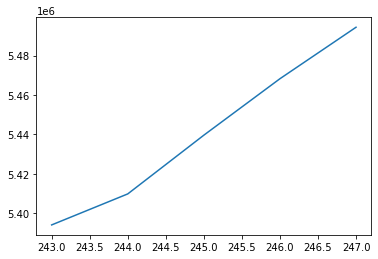

In [ ]:
BrCOVID19Macro[semanas & casos]['cases'].plot()

Como nós já sabemos desde o início que os dados são de casos no Brasil e nesta seleção final do DataFrame nós estamos focamos na semana #44, não é necessário que estas informações apareçam no resultado. Podemos selecionar apenas as colunas que nos interessam:

In [ ]:
semanas = BrCOVID19Macro['week'] == 44
casos = BrCOVID19Macro['cases'] < 5500000
BrCOVID19Macro[semanas & casos][['date','cases','deaths','recovered','monitoring']]

,date,cases,deaths,recovered,monitoring
243,2020-10-25,5394128,157134,4835915.0,401079.0
244,2020-10-26,5409854,157397,4865930.0,386527.0
245,2020-10-27,5439641,157946,4904046.0,377649.0
246,2020-10-28,5468270,158456,4934548.0,375266.0
247,2020-10-29,5494376,158969,4954159.0,381248.0


Por que não selecionar ainda um número de linhas menor?

In [ ]:
semanas = BrCOVID19Macro['week'] == 44
casos = BrCOVID19Macro['cases'] < 5500000
BrCOVID19Macro[semanas & casos][['date','cases','deaths','recovered','monitoring']][:2]

,date,cases,deaths,recovered,monitoring
243,2020-10-25,5394128,157134,4835915.0,401079.0
244,2020-10-26,5409854,157397,4865930.0,386527.0


Vamos voltar a olhar para o nosso DataFrame original.
Plotando o número de casos de COVID-19 do início da pandemia até o início de novembro/2020

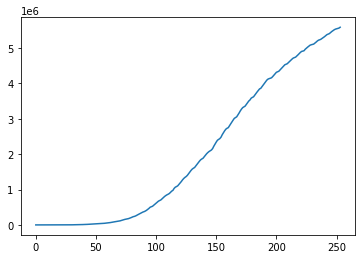

In [ ]:
BrCOVID19Macro['cases'].plot()

Um método bastante interessante que é usado em DataFrame é o `.groupby()`
Ele permite agrupar dados de interesse do usuário. A documentação deste método em pandas está [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

(para quem tem familiaridade com SQL, esta linguagem tem funcionalidades muito semelhantes)

Em vez de fazer uma análise para cada dia desde o início da pandemia, façamos uma análise por semana:

In [ ]:
BrCOVID19Macro.groupby('week').aggregate(sum)

,cases,deaths,recovered,monitoring
week,,,,
9,5,0,0.0,0.0
10,48,0,0.0,0.0
11,432,0,0.0,0.0
12,3806,40,0.0,0.0
13,18306,445,0.0,0.0
14,48630,1827,0.0,0.0
15,111052,5627,0.0,0.0
16,199887,12231,0.0,0.0
17,329067,21683,178152.0,129232.0


Podemos salvar os resultados da seleção em um novo DataFrame.

In [ ]:
BrCOVID19Macro_week = BrCOVID19Macro.groupby('week').aggregate(sum)

In [ ]:
BrCOVID19Macro_week

,cases,deaths,recovered,monitoring
week,,,,
9,5,0,0.0,0.0
10,48,0,0.0,0.0
11,432,0,0.0,0.0
12,3806,40,0.0,0.0
13,18306,445,0.0,0.0
14,48630,1827,0.0,0.0
15,111052,5627,0.0,0.0
16,199887,12231,0.0,0.0
17,329067,21683,178152.0,129232.0


In [ ]:
BrCOVID19Macro

,date,country,week,cases,deaths,recovered,monitoring
0,2020-02-25,Brasil,9,0,0,NaN,NaN
1,2020-02-26,Brasil,9,1,0,NaN,NaN
2,2020-02-27,Brasil,9,1,0,NaN,NaN
3,2020-02-28,Brasil,9,1,0,NaN,NaN
4,2020-02-29,Brasil,9,2,0,NaN,NaN
...,...,...,...,...,...,...,...
249,2020-10-31,Brasil,44,5535605,159884,4972898.0,402823.0
250,2020-11-01,Brasil,45,5545705,160074,4980942.0,404689.0
251,2020-11-02,Brasil,45,5554206,160253,4998408.0,395545.0
252,2020-11-03,Brasil,45,5566049,160496,5028216.0,377337.0


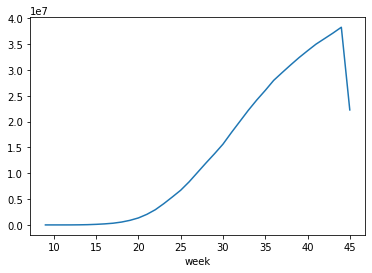

In [ ]:
BrCOVID19Macro_week['cases'].plot()

Estes resultados não fazem tanto sentido pelos seguintes motivos:
 * A última semana estamos com um número caindo de casos. Isso simplesmente porque a última semana tem um número menor de dias registrados
 * Além disso, estamos somando números que já correspondem à soma de casos (cumulativos)
 * Para obter os valores brutos de ocorrência em cada dia, teríamos que subtrair um dia do anterior e obter a variável "novos casos", o que daria bastante trabalho para a atividade de hoje

Vamos usar outros dados, para os quais faria mais sentido um agrupamento por soma. Vamos pegar os dados de população de diferentes cidades, nos estados brasileiros.

In [ ]:
BrPopulation2019 = pd.read_csv('/content/drive/My Drive/UNICAMP/GBMeeting/Workshop de Python para GBMeeters/brazil_population_2019.csv', error_bad_lines=False)

b'Skipping line 1282: expected 8 fields, saw 9\nSkipping line 1283: expected 8 fields, saw 9\nSkipping line 1293: expected 8 fields, saw 9\nSkipping line 1294: expected 8 fields, saw 9\nSkipping line 1300: expected 8 fields, saw 9\nSkipping line 1308: expected 8 fields, saw 9\nSkipping line 1309: expected 8 fields, saw 9\nSkipping line 1314: expected 8 fields, saw 9\nSkipping line 1319: expected 8 fields, saw 9\nSkipping line 1320: expected 8 fields, saw 9\nSkipping line 1321: expected 8 fields, saw 9\nSkipping line 1323: expected 8 fields, saw 9\n'


Este é o DataFrame importado:

In [ ]:
BrPopulation2019

,region,state,city,state_code,city_code,health_region_code,health_region,population
0,Centro-Oeste,Mato Grosso do Sul,Alcinópolis,50,500025,50001,Campo Grande,5343
1,Centro-Oeste,Mato Grosso do Sul,Amambai,50,500060,50003,Dourados,39396
2,Centro-Oeste,Mato Grosso do Sul,Bataguassu,50,500190,50004,Três Lagoas,23024
3,Centro-Oeste,Mato Grosso do Sul,Batayporã,50,500200,50003,Dourados,11329
4,Centro-Oeste,Mato Grosso do Sul,Bela Vista,50,500210,50001,Campo Grande,24629
...,...,...,...,...,...,...,...,...
2848,Sul,Rio Grande do Sul,Vila Lângaro,43,432335,43018,Região 18 - Araucárias,2091
2849,Sul,Rio Grande do Sul,Vila Maria,43,432340,43017,Região 17 - Planalto,4358
2850,Sul,Rio Grande do Sul,Vista Alegre do Prata,43,432360,43025,Região 25 - Vinhedos e Basalto,1561
2851,Sul,Rio Grande do Sul,Westfália,43,432377,43030,Região 30 - Vale da Luz,3014


In [ ]:
BrPopulation2019_RegionPop = BrPopulation2019.groupby('region').aggregate(sum)

In [ ]:
BrPopulation2019_RegionPop

,state_code,city_code,health_region_code,population
region,,,,
Centro-Oeste,7644,76558195,7645065,13085364
Nordeste,26785,268768022,26794484,48946190
Norte,4384,43962079,4385589,14752784
Sudeste,27184,273981304,27232738,80421777
Sul,21334,213958298,21340335,24522343


Eventualmente, você vai querer renomear determinados nomes de coluna no seu DataFrame. Para isso, você pode usar um dicionário, `dict` (que vocês já viram em etapas anteriores do curso) para desempenhar esta função. Como exemplo, vamos colocar o nome de algumas colunas em Português:

In [ ]:
BrCOVID19Macro.rename(columns={
        'country': 'país', 
        'week': 'semana'
    }, inplace=True)

In [ ]:
BrCOVID19Macro.columns

Index(['date', 'país', 'semana', 'cases', 'deaths', 'recovered', 'monitoring'], dtype='object')

Usando uma `lista`, você poderia também substituir todos os nomes de colunas de uma única vez:

In [ ]:
BrCOVID19Macro.columns = ['data', 'país', 'semana', 'casos', 'mortes', 'recuperados', 'monitoramento']

In [ ]:
BrCOVID19Macro.columns

Index(['data', 'país', 'semana', 'casos', 'mortes', 'recuperados',
       'monitoramento'],
      dtype='object')

Como podemos selecionar dados dentro de um dado DataFrame?
Vamos começar extraindo informações de uma coluna.

Podemos usar colchetes e o nome da coluna para poder extraí-la como `Series`:


In [ ]:
BrCOVID19Macro['casos']

0            0
1            1
2            1
3            1
4            2
        ...   
249    5535605
250    5545705
251    5554206
252    5566049
253    5590025
Name: casos, Length: 254, dtype: int64

No entanto, é possível também extrair informações de colunas como um novo DataFrame usando uma `lista`. Usando o mesmo exemplo anterior, temos apenas um nome de coluna:

In [ ]:
BrCOVID19Macro[['casos']]

,casos
0,0
1,1
2,1
3,1
4,2
...,...
249,5535605
250,5545705
251,5554206
252,5566049


In [ ]:
for c in BrCOVID19Macro: # c é o nome de variável a que estamos atribuindo cada uma das colunas
  print(c)

date
country
week
cases
deaths
recovered
monitoring


In [ ]:
BrCOVID19Macro['date'].isna().mean()*100

0.0

In [ ]:
BrCOVID19Macro['recovered'].isna().mean()*100

21.25984251968504

In [ ]:
NAN = [(c, BrCOVID19Macro[c].isna().mean()*100) for c in BrCOVID19Macro]
NAN = pd.DataFrame(NAN, columns=["nome_coluna", "porcentagem"])
NAN

,nome_coluna,porcentagem
0,date,0.000000
1,country,0.000000
2,week,0.000000
3,cases,0.000000
4,deaths,0.000000
5,recovered,21.259843
6,monitoring,21.259843


Verificando qual o tipo de dado em cada uma das colunas do nosso dataframe:

In [ ]:
BrCOVID19Macro.dtypes

date           object
country        object
week            int64
cases           int64
deaths          int64
recovered     float64
monitoring    float64
dtype: object

Como exemplo de operação com series de dados em dataframe do pandas, vamos fazer alguns cálculos com os nossos dados. 

In [ ]:
BrCOVID19Macro['active_cases'] = BrCOVID19Macro['cases'] - BrCOVID19Macro['deaths'] - BrCOVID19Macro['recovered']

In [ ]:
BrCOVID19Macro.tail()

,date,country,week,cases,deaths,recovered,monitoring,active_cases
249,2020-10-31,Brasil,44,5535605,159884,4972898.0,402823.0,402823.0
250,2020-11-01,Brasil,45,5545705,160074,4980942.0,404689.0,404689.0
251,2020-11-02,Brasil,45,5554206,160253,4998408.0,395545.0,395545.0
252,2020-11-03,Brasil,45,5566049,160496,5028216.0,377337.0,377337.0
253,2020-11-04,Brasil,45,5590025,161106,5064344.0,364575.0,364575.0


## Algumas referências adicionais

 * https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

 * McKinney, Wes. Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.", 2012.